In [1]:
import gridgeo


gridgeo.__version__

'0.2.1+7.ge801796.dirty'

In [2]:
url = 'http://thredds.cencoos.org/thredds/dodsC/CA_DAS.nc'

grid = gridgeo.GridGeo(
    url,
    standard_name='sea_water_temperature'
)

In [3]:
grid.mesh

'unknown_1d'

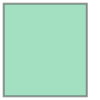

In [4]:
grid.outline

The grid has 136500, showing the first 5.


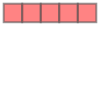

In [5]:
print(f'The grid has {len(grid.polygons)}, showing the first 5.')

grid.polygons[:5]

In [6]:
import folium


x, y = grid.outline.centroid.xy

m = folium.Map(location=[y[0], x[0]])
folium.GeoJson(grid.outline.__geo_interface__).add_to(m)
m.fit_bounds(m.get_bounds())

m